# Predicting the flow

### Multiple regression with decision tree
The model includes the historical value of the flow for a given hour and the value of the flow of one previous hour

### Importing necessary libraries

In [31]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime as dt
import numpy as np
from sklearn.neural_network import MLPRegressor
%matplotlib inline 

### Loading the data set

In [32]:
flow = pd.read_csv('../dataset/flow1.csv', parse_dates=['time'])
flow.head()

,time,flow
0,2015-06-01 14:15:00,115.559998
1,2015-06-01 14:20:00,115.199997
2,2015-06-01 14:25:00,112.209999
3,2015-06-01 14:30:00,112.860001
4,2015-06-01 14:35:00,113.349998


### Preparing the data 
Making the mean for each hour, reseting the index put on the time and leaving only integer representing the current hour

In [33]:
flow_h = pd.read_csv('../dataset/flow1.csv', parse_dates={'hour':['time']},index_col='hour')
dayfirst=True
flow_h = flow_h.resample('60T').mean()

In [34]:
flow_h = flow_h.reset_index()

In [35]:
flow_h['time'] = flow_h['hour']
flow_h.head()

,hour,flow,time
0,2015-06-01 14:00:00,113.754443,2015-06-01 14:00:00
1,2015-06-01 15:00:00,113.013333,2015-06-01 15:00:00
2,2015-06-01 16:00:00,114.081666,2015-06-01 16:00:00
3,2015-06-01 17:00:00,116.459167,2015-06-01 17:00:00
4,2015-06-01 18:00:00,123.825000,2015-06-01 18:00:00


In [36]:
flow_h['hour'] = (flow_h['hour'].dt.hour)

In [37]:
flow_h.head()

,hour,flow,time
0,14,113.754443,2015-06-01 14:00:00
1,15,113.013333,2015-06-01 15:00:00
2,16,114.081666,2015-06-01 16:00:00
3,17,116.459167,2015-06-01 17:00:00
4,18,123.825000,2015-06-01 18:00:00


### Adding the column with the value of previous hour

In [38]:
flow_h['previous-hour'] = flow_h['flow'].shift(1)

In [39]:
flow_h.head()

,hour,flow,time,previous-hour
0,14,113.754443,2015-06-01 14:00:00,NaN
1,15,113.013333,2015-06-01 15:00:00,113.754443
2,16,114.081666,2015-06-01 16:00:00,113.013333
3,17,116.459167,2015-06-01 17:00:00,114.081666
4,18,123.825000,2015-06-01 18:00:00,116.459167


In [40]:
flow_h.describe()

,hour,flow,previous-hour
count,21433.000000,21295.000000,21294.000000
mean,11.500117,109.165175,109.165265
std,6.922208,23.405857,23.406403
min,0.000000,39.250000,39.250000
25%,6.000000,96.350000,96.347500
50%,12.000000,112.910000,112.910834
75%,17.000000,123.108333,123.108750
max,23.000000,589.367493,589.367493


### Splitting the data set into train and test sets

In [41]:
split_date = pd.datetime(2016,12,31,23,59)

flow_training = flow_h.loc[flow_h['time'] <= split_date]
flow_test = flow_h.loc[flow_h['time'] > split_date]

flow_training = flow_training.dropna()

In [42]:
flow_training.head()

,hour,flow,time,previous-hour
1,15,113.013333,2015-06-01 15:00:00,113.754443
2,16,114.081666,2015-06-01 16:00:00,113.013333
3,17,116.459167,2015-06-01 17:00:00,114.081666
4,18,123.825000,2015-06-01 18:00:00,116.459167
5,19,128.884998,2015-06-01 19:00:00,123.825000


In [43]:
flow_test.head()

,hour,flow,time,previous-hour
13906,0,94.330833,2017-01-01 00:00:00,99.808334
13907,1,91.927501,2017-01-01 01:00:00,94.330833
13908,2,90.722501,2017-01-01 02:00:00,91.927501
13909,3,87.402501,2017-01-01 03:00:00,90.722501
13910,4,81.485833,2017-01-01 04:00:00,87.402501


In [44]:
X_flow_training = flow_training[['hour','previous-hour']]

In [45]:
X_flow_test = flow_test[['hour','previous-hour']]

In [46]:
Y_flow_training = flow_training['flow']

In [47]:
Y_flow_test = flow_test['flow']

In [48]:
regressor = DecisionTreeRegressor()
regressor.fit(X_flow_training, Y_flow_training)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Creating a multiple regression model with decision tree

In [49]:
predict = regressor.predict(X_flow_test)

### Plot for the model showing only the hour

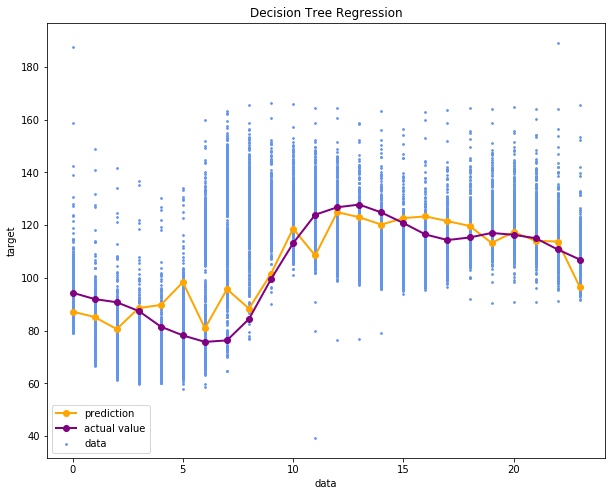

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(X_flow_training['hour'], Y_flow_training, s=3, 
            c="cornflowerblue", label="data")
plt.plot(X_flow_test['hour'][:24], predict[:24], color="orange",
         marker="o",label="prediction", linewidth=2)
plt.plot(X_flow_test['hour'][:24],Y_flow_test[:24], c='purple',marker="o", label="actual value",linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### 3D Plot showing multiple regression

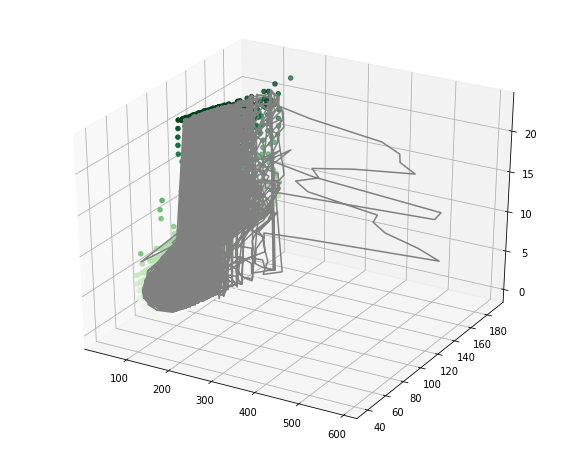

In [51]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

#line
zline = X_flow_test['hour']
xline = X_flow_test['previous-hour']
yline = predict
ax.plot3D(xline, yline, zline, 'gray')

#scatter plot
zdata = X_flow_training['hour']
xdata = X_flow_training['previous-hour']
ydata = Y_flow_training
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

### Feature_importances_
The importance in the model of the feature hour and the feature previous hour

In [52]:
importance = regressor.feature_importances_

In [53]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
0,0.675045
1,0.324955


### Implementing metrics (mean absolute percentage error)
Regression tree

In [54]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### MAPE for tree regression

In [55]:
mape_tree = mean_absolute_percentage_error(Y_flow_test, predict)
mape_tree

3.8466694695317347

# Comparison with neural network

### Creating a model
MLPRegressor() from sklearn.neural_network

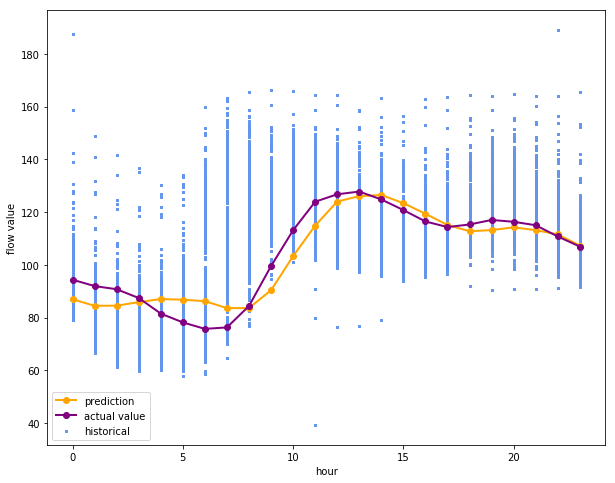

In [58]:
X = X_flow_training[['hour','previous-hour']]
y = Y_flow_training
test_x = X_flow_test[['hour','previous-hour']]
test_y = Y_flow_test
    
nn = MLPRegressor()
n = nn.fit(X, y.ravel())
predict_y = nn.predict(test_x)
    
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

plt.xlabel("hour")
plt.ylabel("flow value")

ax1.scatter(X['hour'], y, s=3, color="cornflowerblue", marker="s", label='historical')
plt.plot(test_x['hour'][:24],predict_y[:24], color='orange', marker="o", label="prediction",linewidth=2)
plt.plot(test_x['hour'][:24],test_y[:24], c='purple', marker="o", label="actual value",linewidth=2)
plt.legend()
plt.show()

### MAPE for the neural network

In [59]:
mape_neural = mean_absolute_percentage_error(Y_flow_test, predict_y)
mape_neural

4.855504401644947